In [98]:
# To be able to create instance of NeuralNetwork class present in the below listed notebook
%run Neural-Network.ipynb

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
data_file = open('data/mnist_train_100.csv', 'r')
data_list = data_file.readlines()
data_file.close()

# Analyzing the data

In [37]:
len(data_list)

100

In [38]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [39]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))

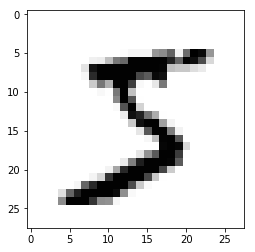

In [40]:
plt.imshow(image_array, cmap='Greys', interpolation=None)

### We have to scale the input data so that it works well with the activation function .

In [41]:
# The range of the input data is from 0 -255, scaling it down to 0.01 - 1
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

### The neural network used to classify the images should have an output layer, consisting of 10 nodes, one for each possible label

In [42]:
# Preparing a sample target matrix
onodes = 10
targets = np.zeros(onodes) + 0.01 # Because the activation func can never produce an output of 0
targets[int(all_values[0])] = 0.99
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


# Using the neural network to classify data

In [90]:
# Parameters of the neural net
input_nodes = 784
hidden_nodes = 500 # Just chosen without a specific reason
output_nodes = 10
learning_rate = 0.15 # Changing the learning_rate changes the performance of the network .

In [91]:
# Create instance of neural network
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [92]:
# Read the data
training_data_file = open('data/mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

### Training the neural network

In [93]:
epochs = 7

for e in range(epochs):
    # Go thorugh all the records in the training data set
    for record in training_data_list:
        # split the record on ',' commas
        all_values = record.split(',')
        # scale the inputs to range 0.01 - 1
        inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
        # create the target output values ( all 0.01 except for the desired label, which will be 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the actual label for the image
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

### Testing the network

In [94]:
# Read the test data
test_data_file = open('data/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [95]:
# scorecard for how well the network performs, initially empty
scorecard = []

In [96]:
# go through all records in the test data set
for record in test_data_list:
    # split the record on commas ','
    all_values = record.split(',')
    # correct value of the label is the first item
    correct_label = int(all_values[0])
#     print(correct_label, 'correct label')
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the output predicted by the network
    label = np.argmax(outputs)
#     print(label, 'network\'s prediction')
    # add score to scorecard
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

In [97]:
# print the performance score
scorecard_array = np.array(scorecard)
print(f'Performance of network is {scorecard_array.sum() / scorecard_array.size * 100}%')

Performance of network is 97.49%
